In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from matplotlib import font_manager
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rc('font', family='NanumGothic')

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
train_data = pd.read_csv('../dataset/Income/train.csv')
test_data = pd.read_csv('../dataset/Income/test.csv')
sample_submission = pd.read_csv('../dataset/Income/sample_submission.csv')

# Feature Engineering

## Feature Generation
- Numerical data인 Gains, Losses, Dividends, Age, Working_Week(Yearly) 데이터를 가지고 사칙연산을 통한 새 feature 생성

In [3]:
target='Income'
def preprocess_df(data):
    df = data.copy()
    
    df['Profit'] = df['Gains'] - df['Losses'] + df['Dividends']
    df['ProfitRatio'] = (df['Gains'] + df['Dividends']) / (df['Losses'] + 1)
    df['AgeWorking'] = df['Age'] * (df['Working_Week (Yearly)']+1)
    
    drops = ['ID']
    df.drop(drops, axis=1, inplace=True)
    
    return df

In [4]:
train = preprocess_df(train_data)
test = preprocess_df(test_data)

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,35.632500,17.994414,0.0,23.0,34.0,47.0,90.0
Working_Week (Yearly),20000.0,34.943050,22.254592,0.0,7.0,52.0,52.0,52.0
Gains,20000.0,383.129500,4144.247487,0.0,0.0,0.0,0.0,99999.0
Losses,20000.0,40.202150,279.182677,0.0,0.0,0.0,0.0,4356.0
Dividends,20000.0,123.451450,1206.949429,0.0,0.0,0.0,0.0,45000.0
Income,20000.0,554.565250,701.553155,0.0,0.0,500.0,875.0,9999.0
Profit,20000.0,466.378800,4420.562958,-4356.0,0.0,0.0,0.0,123999.0
ProfitRatio,20000.0,501.638072,4407.316797,0.0,0.0,0.0,0.0,123999.0
AgeWorking,20000.0,1363.318450,1021.229359,0.0,190.0,1431.0,2160.0,4770.0


# Data Analysis

## Target Data (Income)

Text(0.5, 1.0, 'Boxplot of Income')

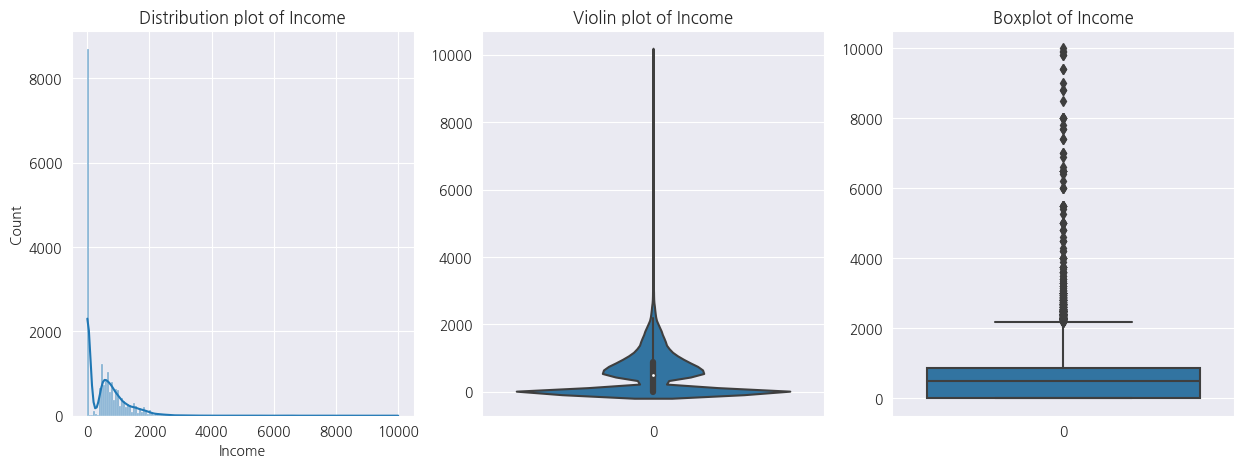

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train[target], kde=True, ax=axes[0])
sns.violinplot(train[target], ax=axes[1])
sns.boxplot(train[target], ax=axes[2])

axes[0].set_title("Distribution plot of Income")
axes[1].set_title("Violin plot of Income")
axes[2].set_title("Boxplot of Income")

In [8]:
print(f"the Number of data with 0 income: {len(train[train[target]==0])}")
print(f"Ratio of 0 income data: {len(train[train[target]==0])/train.shape[0]}")

the Number of data with 0 income: 8697
Ratio of 0 income data: 0.43485


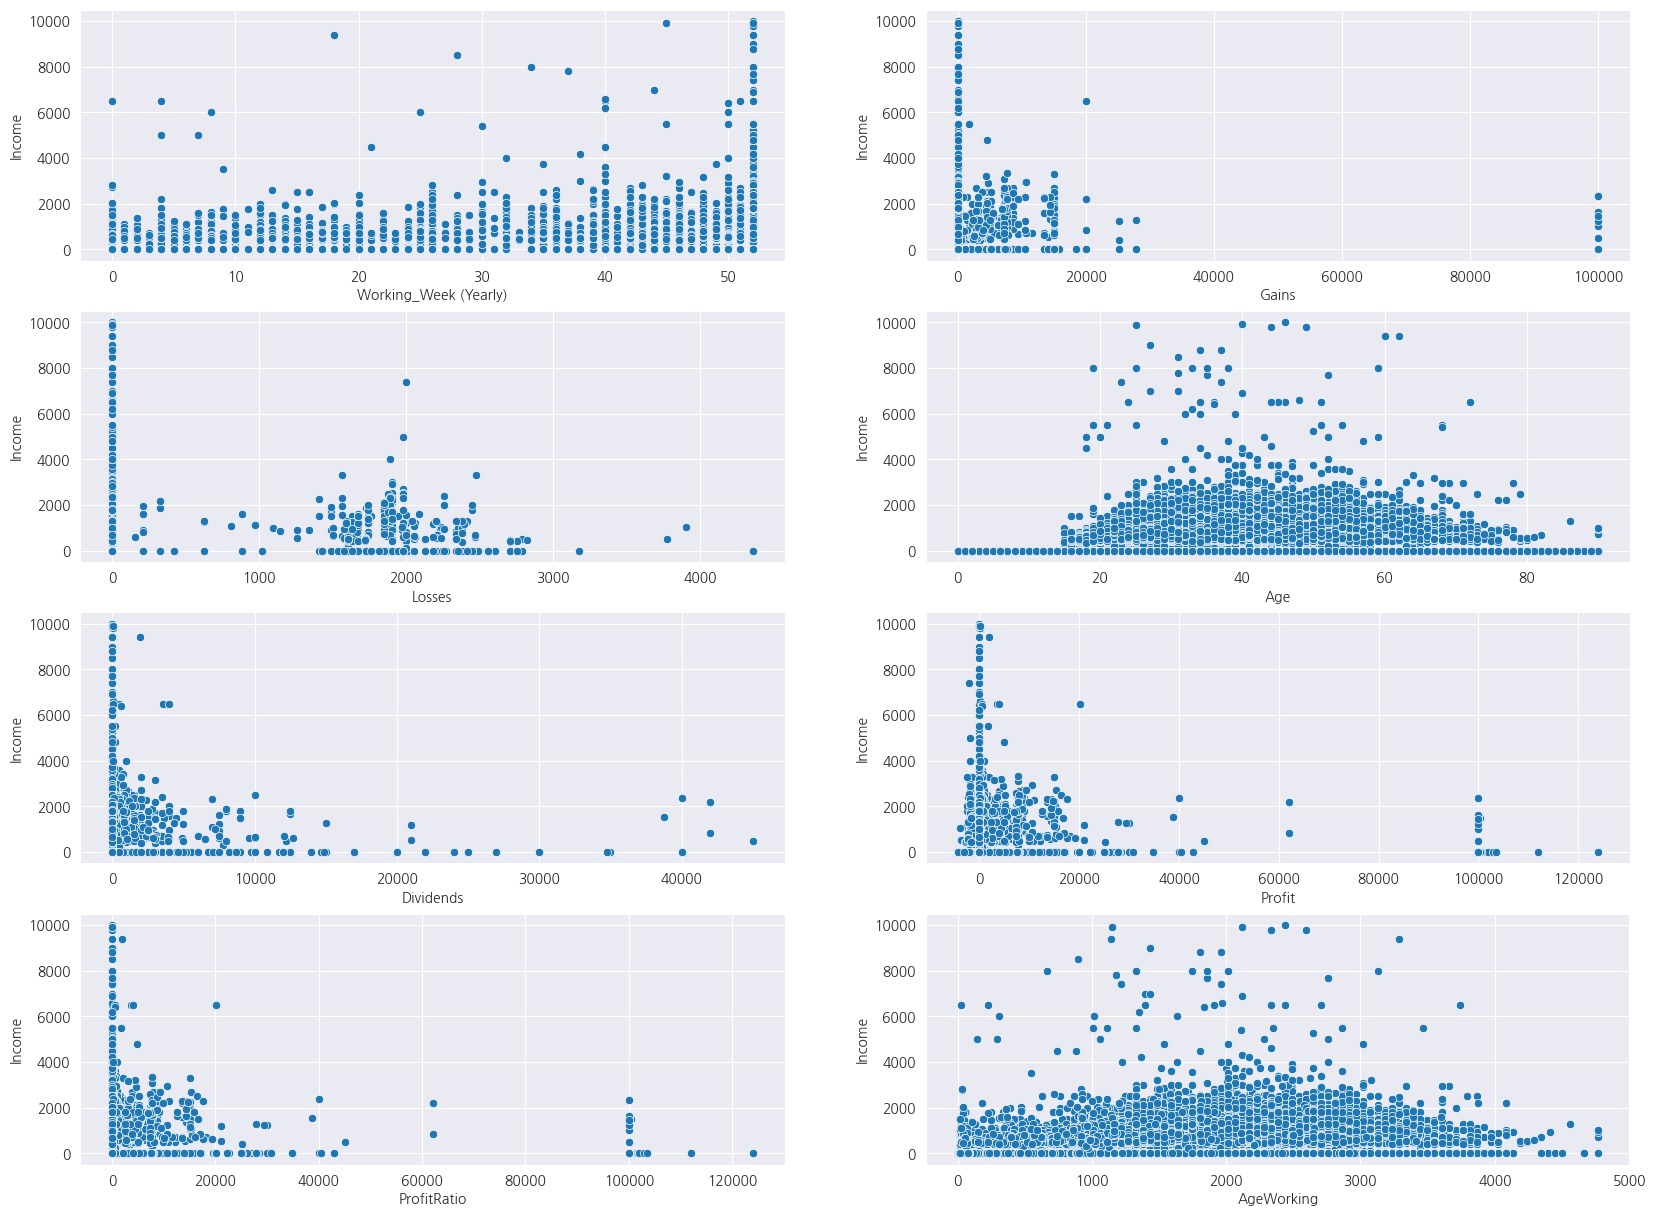

In [9]:
num_features = ['Working_Week (Yearly)', 'Gains', 'Losses', 'Age', 'Dividends','Profit', 'ProfitRatio', 'AgeWorking']
plt.subplots(figsize=(20, 15))
plt.clf()

for i, feature in enumerate(num_features):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=feature, y=target, data=train, )

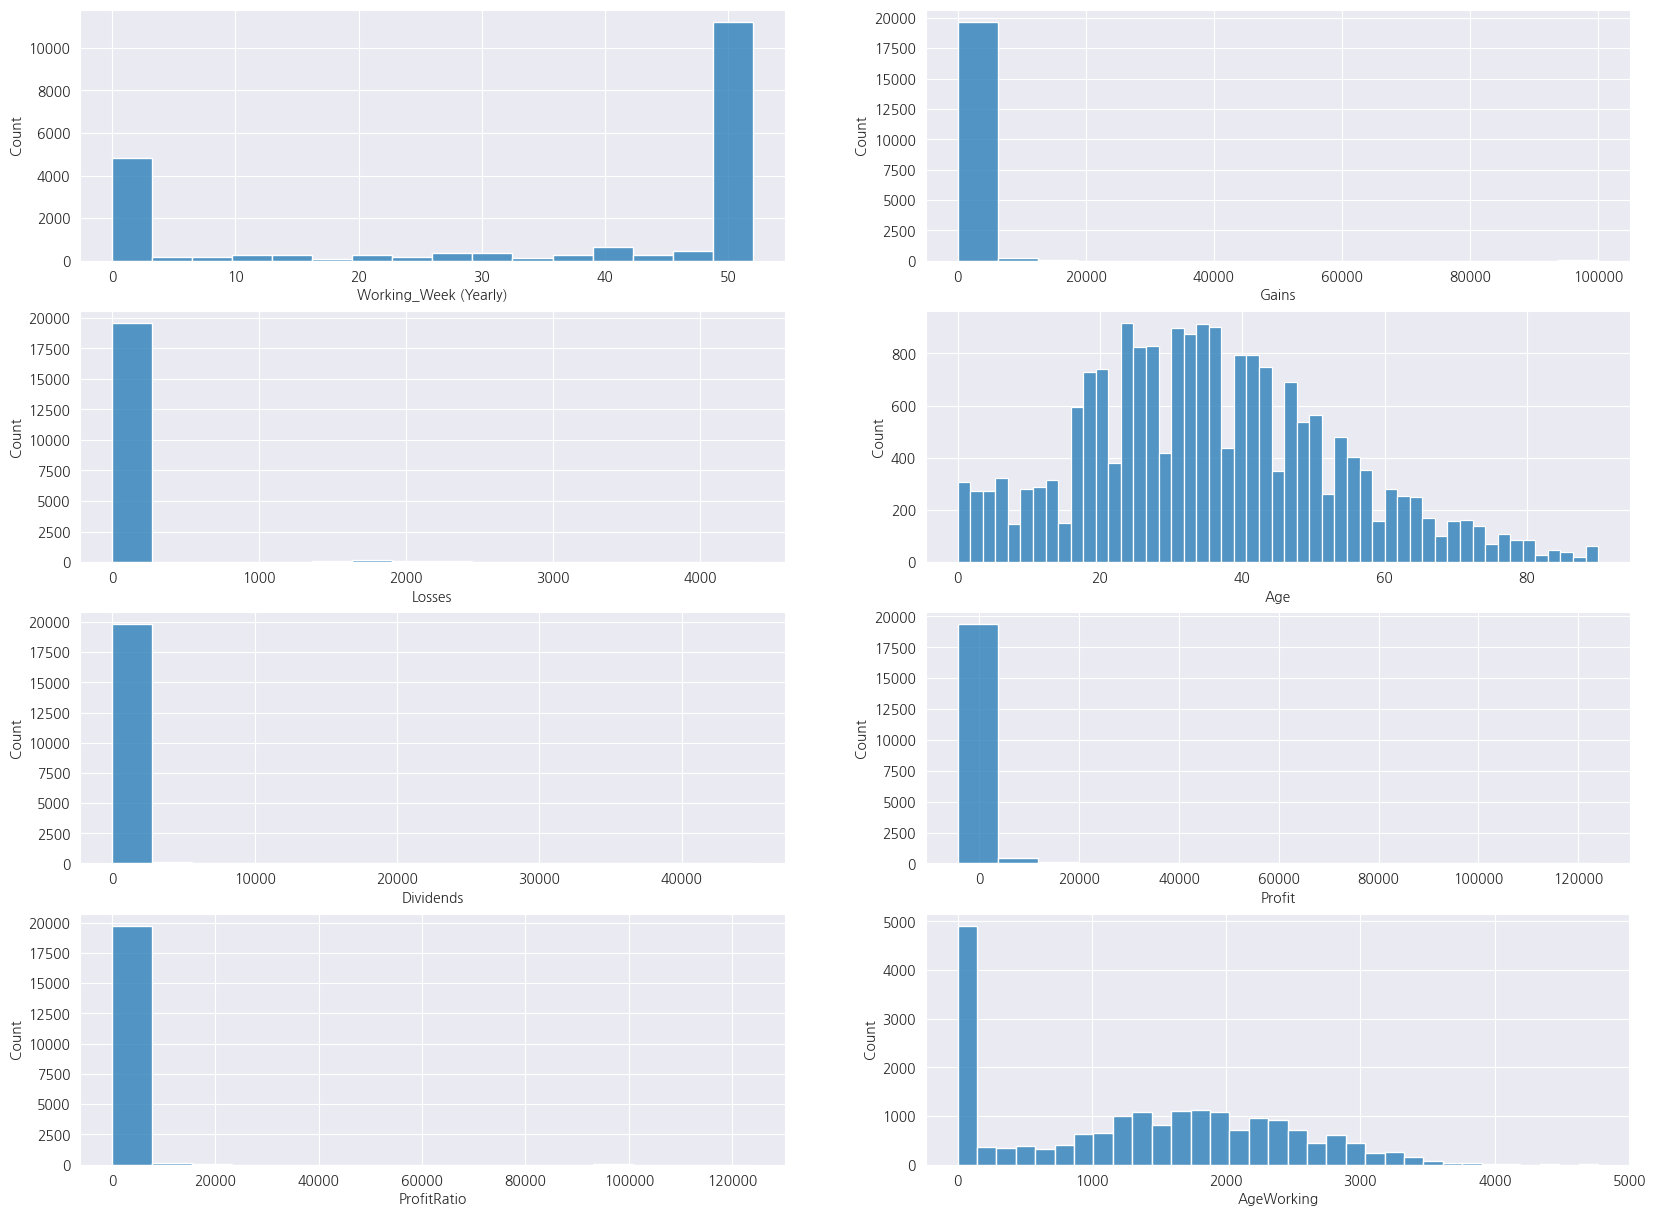

In [10]:
plt.subplots(figsize=(20, 15))
plt.clf()

for i, feature in enumerate(num_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(x=feature, data=train, )

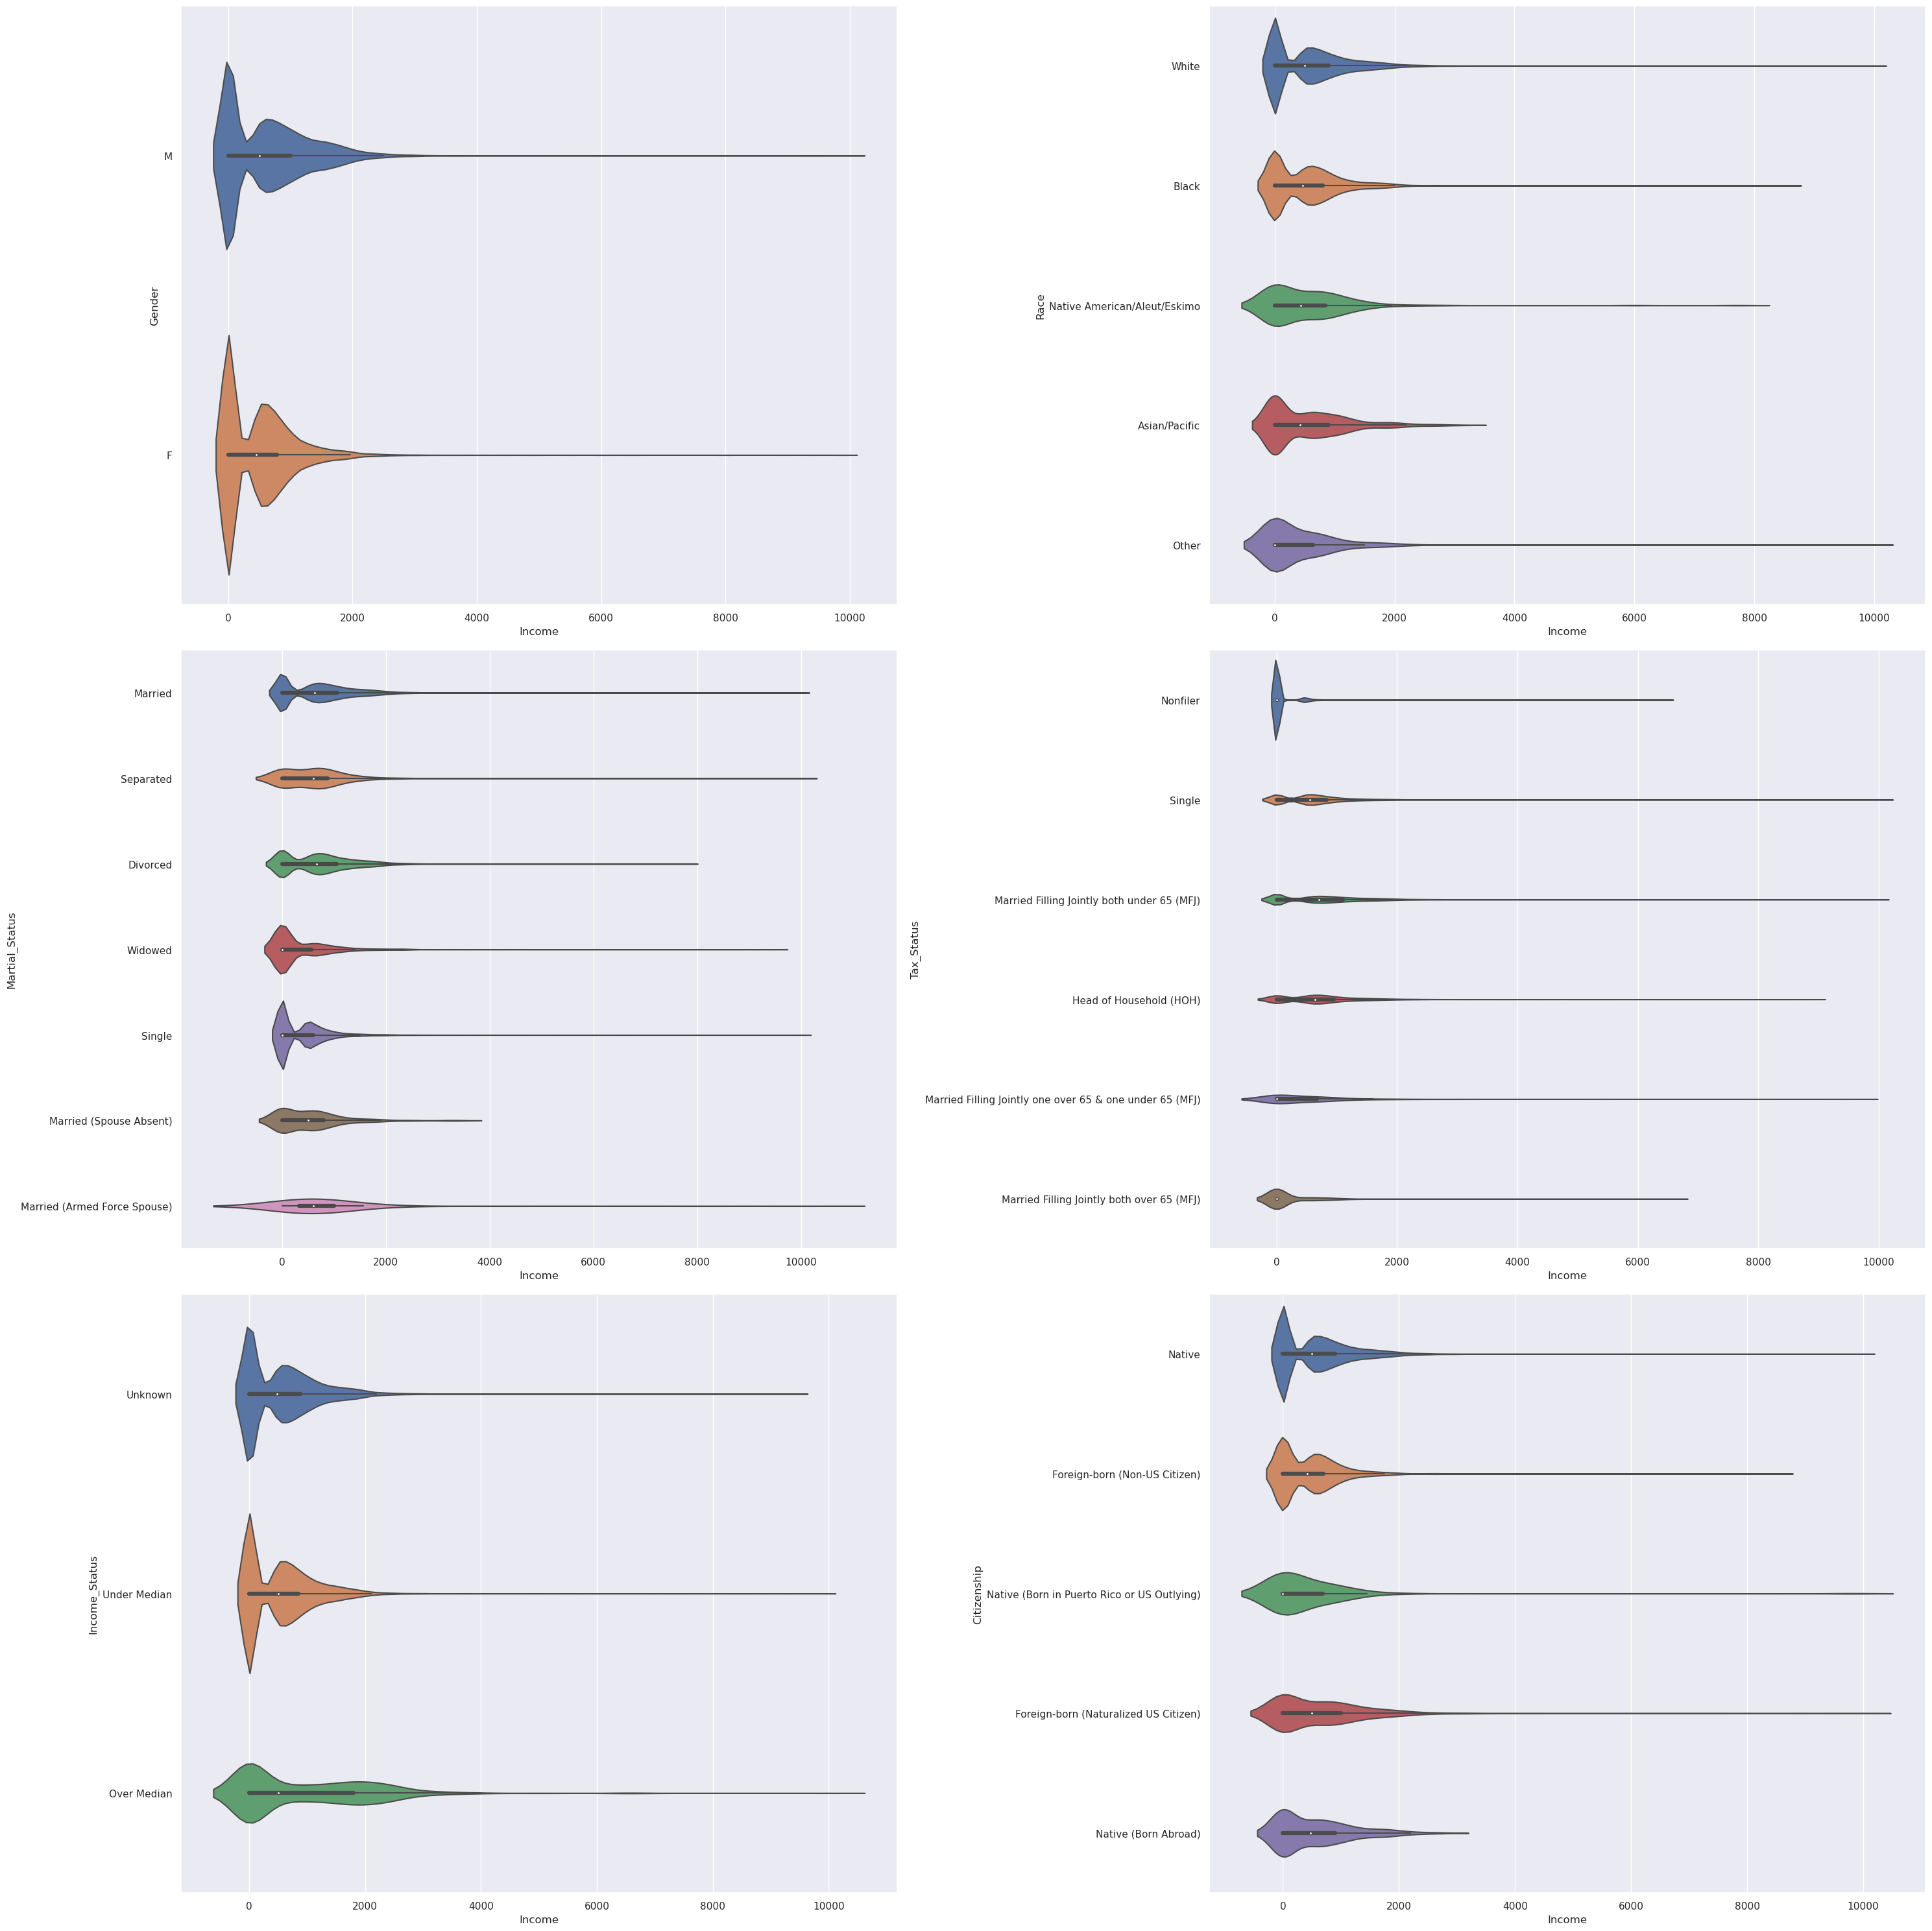

In [74]:
cat_cols = list(train.select_dtypes(include='object').columns)
cat_cols_s = ['Gender', 'Race', 'Martial_Status', 'Tax_Status', 'Income_Status', 'Citizenship'] # 'Education_Status', 'Industry_Status', 'Occupation_Status', 'Household_summary', 'Hispanic_Origin', 'Household_Status'

plt.subplots(figsize=(30, 30))
plt.clf()

for i, feature in enumerate(cat_cols_s):
    plt.subplot(3, 2, i+1)
    sns.violinplot(x=target, y=feature, data=train)
    plt.tight_layout()

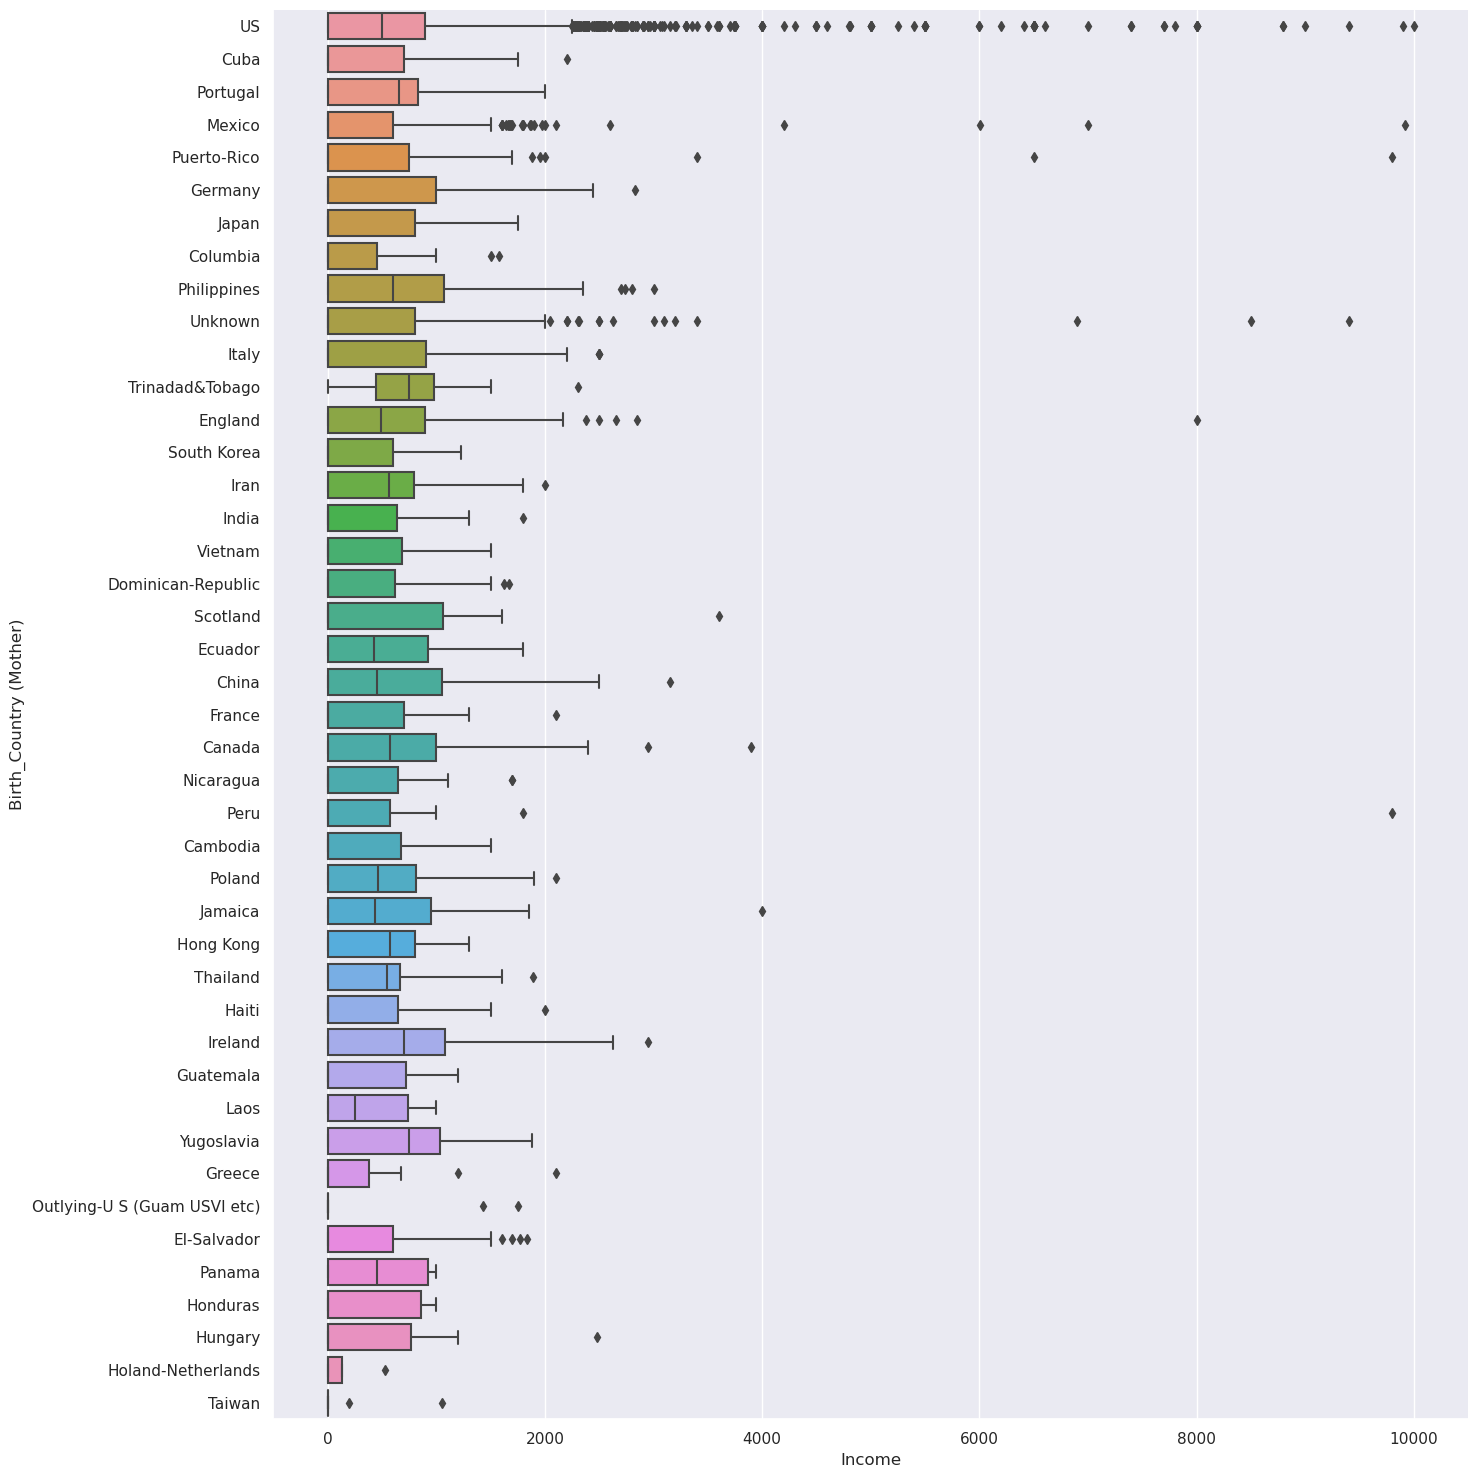

In [111]:
# 카테고리가 많은 컬럼의 경우 따로 확인

cat_cols_l = list(set(cat_cols) - set(cat_cols_s))

sns.set(rc={'figure.figsize': (50, 30),
            'font.size': 14})
# sns.set_context(font_scale=1.5)
sns.catplot(x=target, y=cat_cols_l[9], data=train, kind='box', height=15)
# cat_cols_l[2] == "Child"
# cat_cols_l[3] == "Not Working"
# cat_cols_l[4] == "Panama"
# cat_cols_l[5] == "Panama"
# cat_cols_l[6] == "Unknown" or "Armed Forces"
# cat_cols_l[8] == "Armed Forces" or "Not in universe or children"

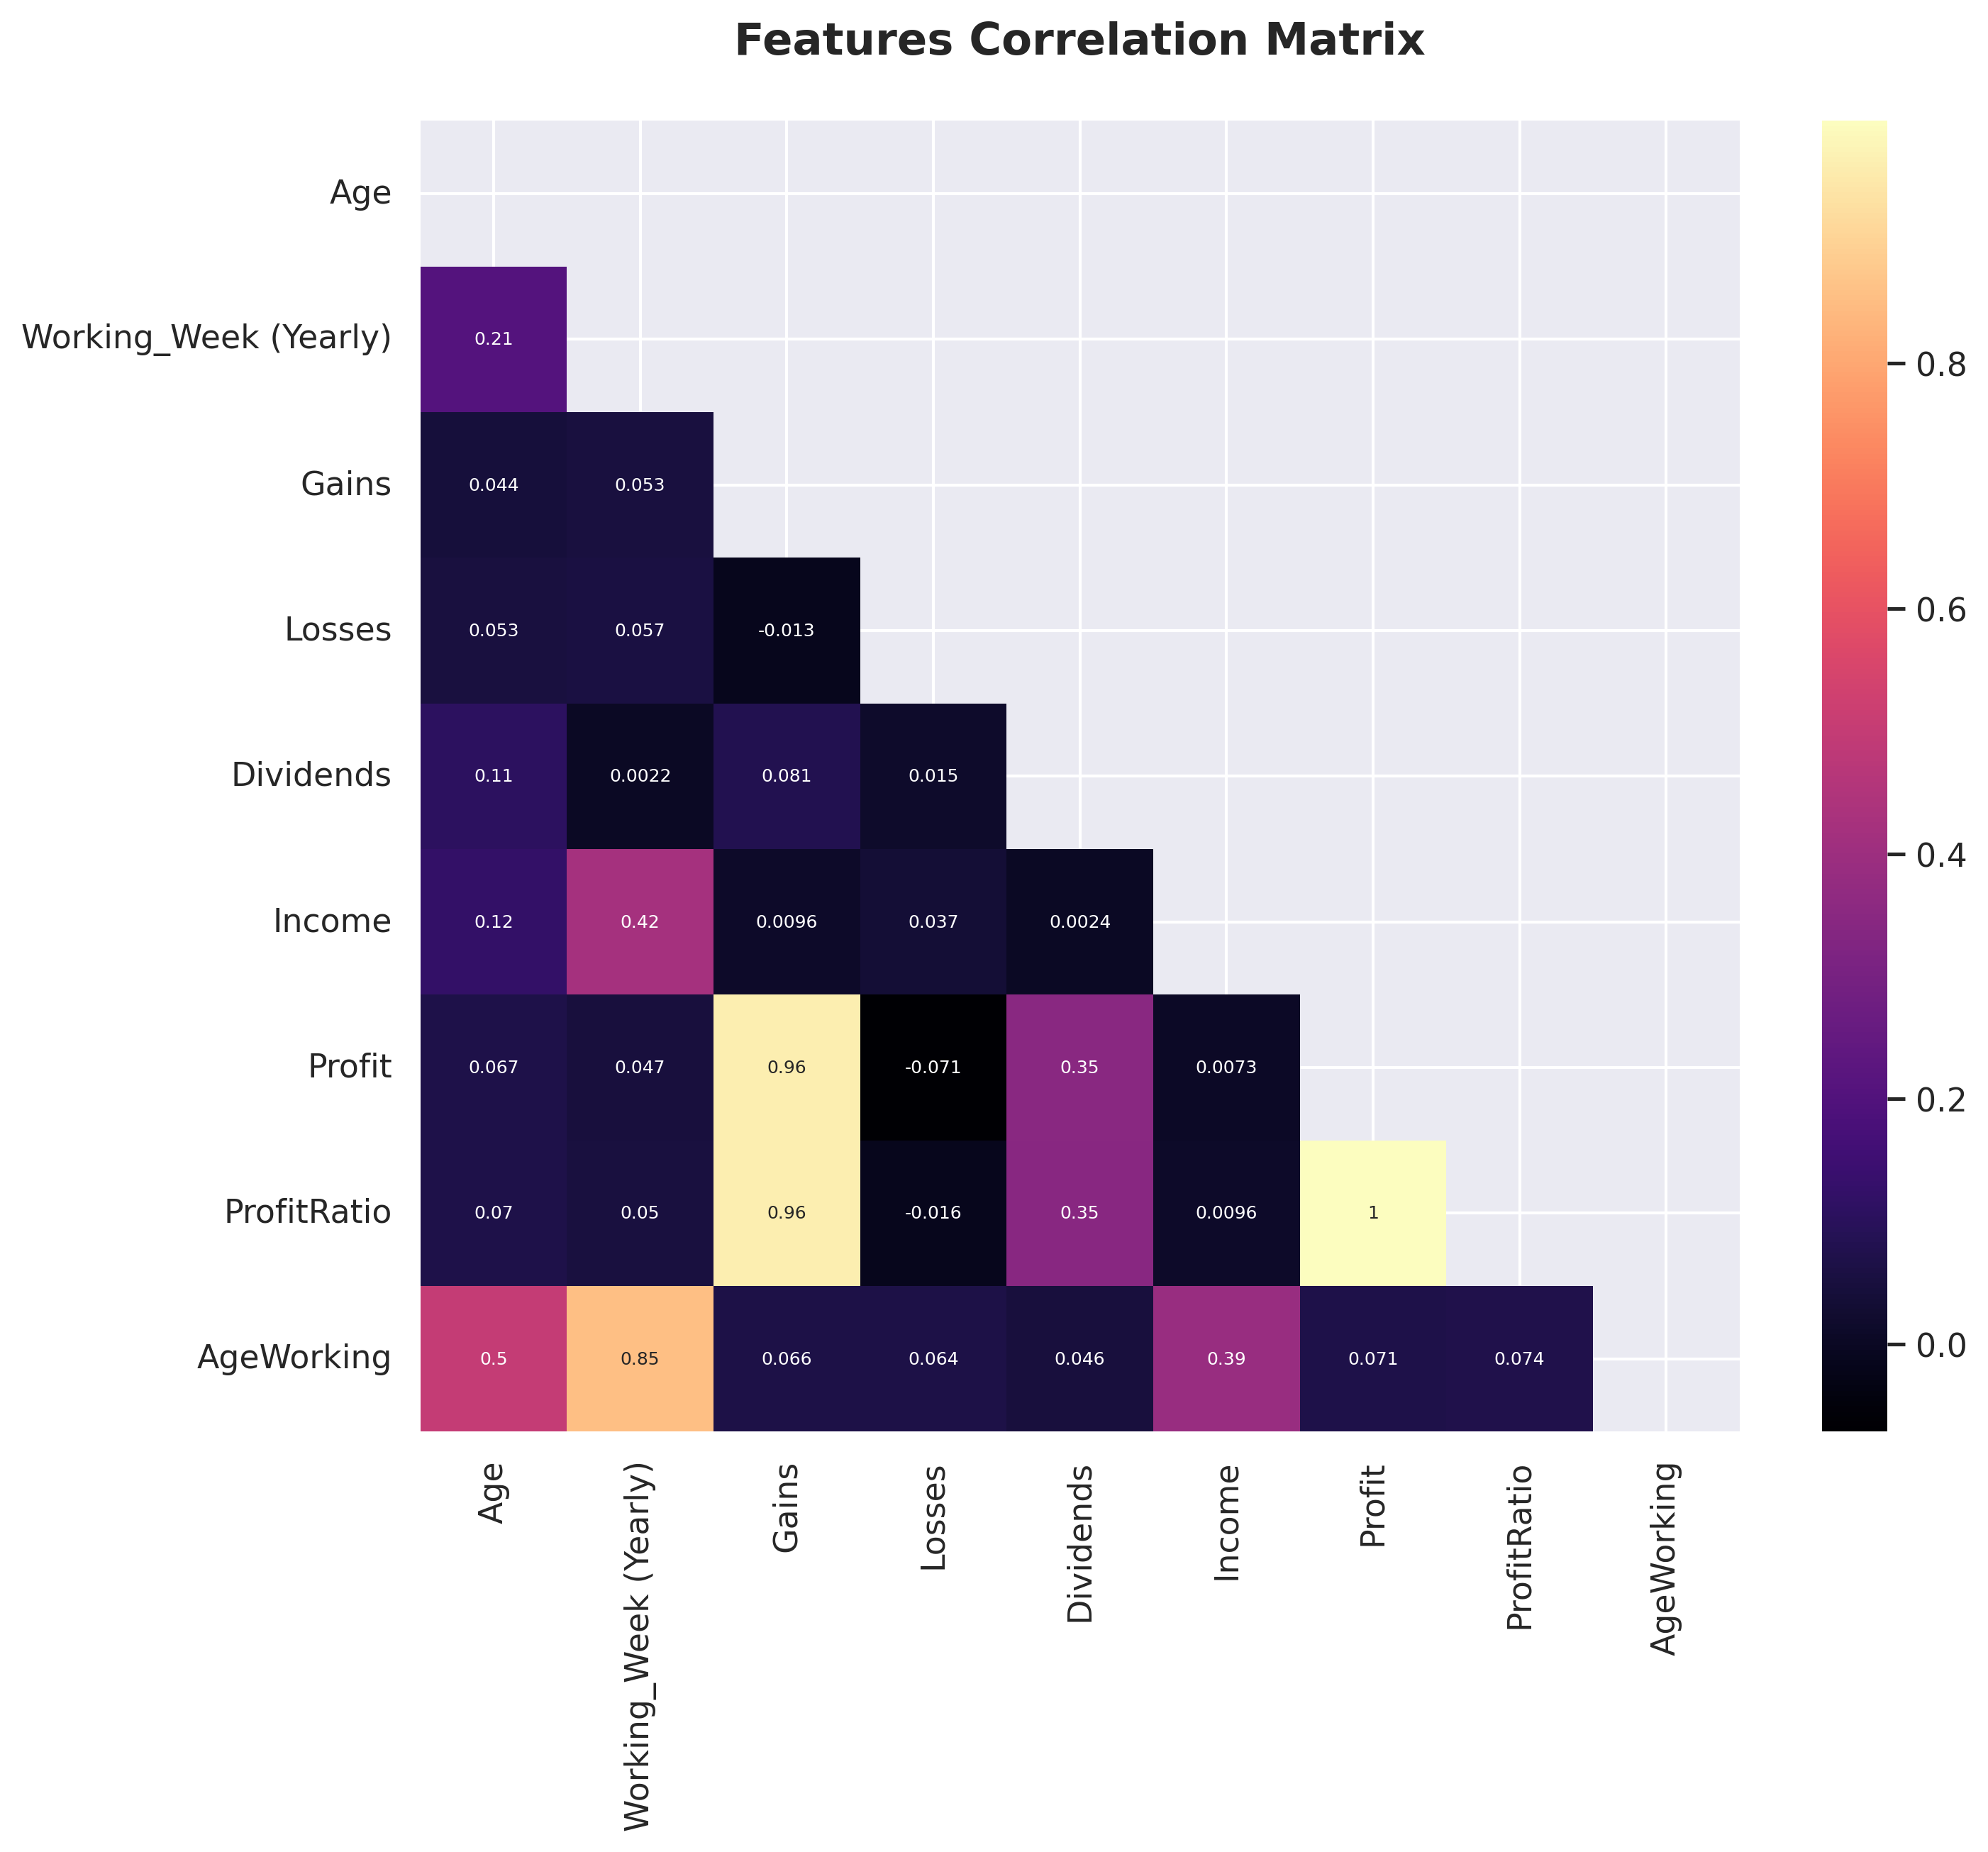

In [76]:
features = train.select_dtypes(include='number').columns.tolist()
corr = train[features].corr()
plt.figure(figsize = (10, 8), dpi = 300)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, cmap = 'magma', annot = True, annot_kws = {'size' : 6})
plt.title('Features Correlation Matrix\n', fontsize = 15, weight = 'bold')
plt.show()

In [107]:
len(cat_cols_l)

10

<Axes: xlabel='Count', ylabel='Hispanic_Origin'>

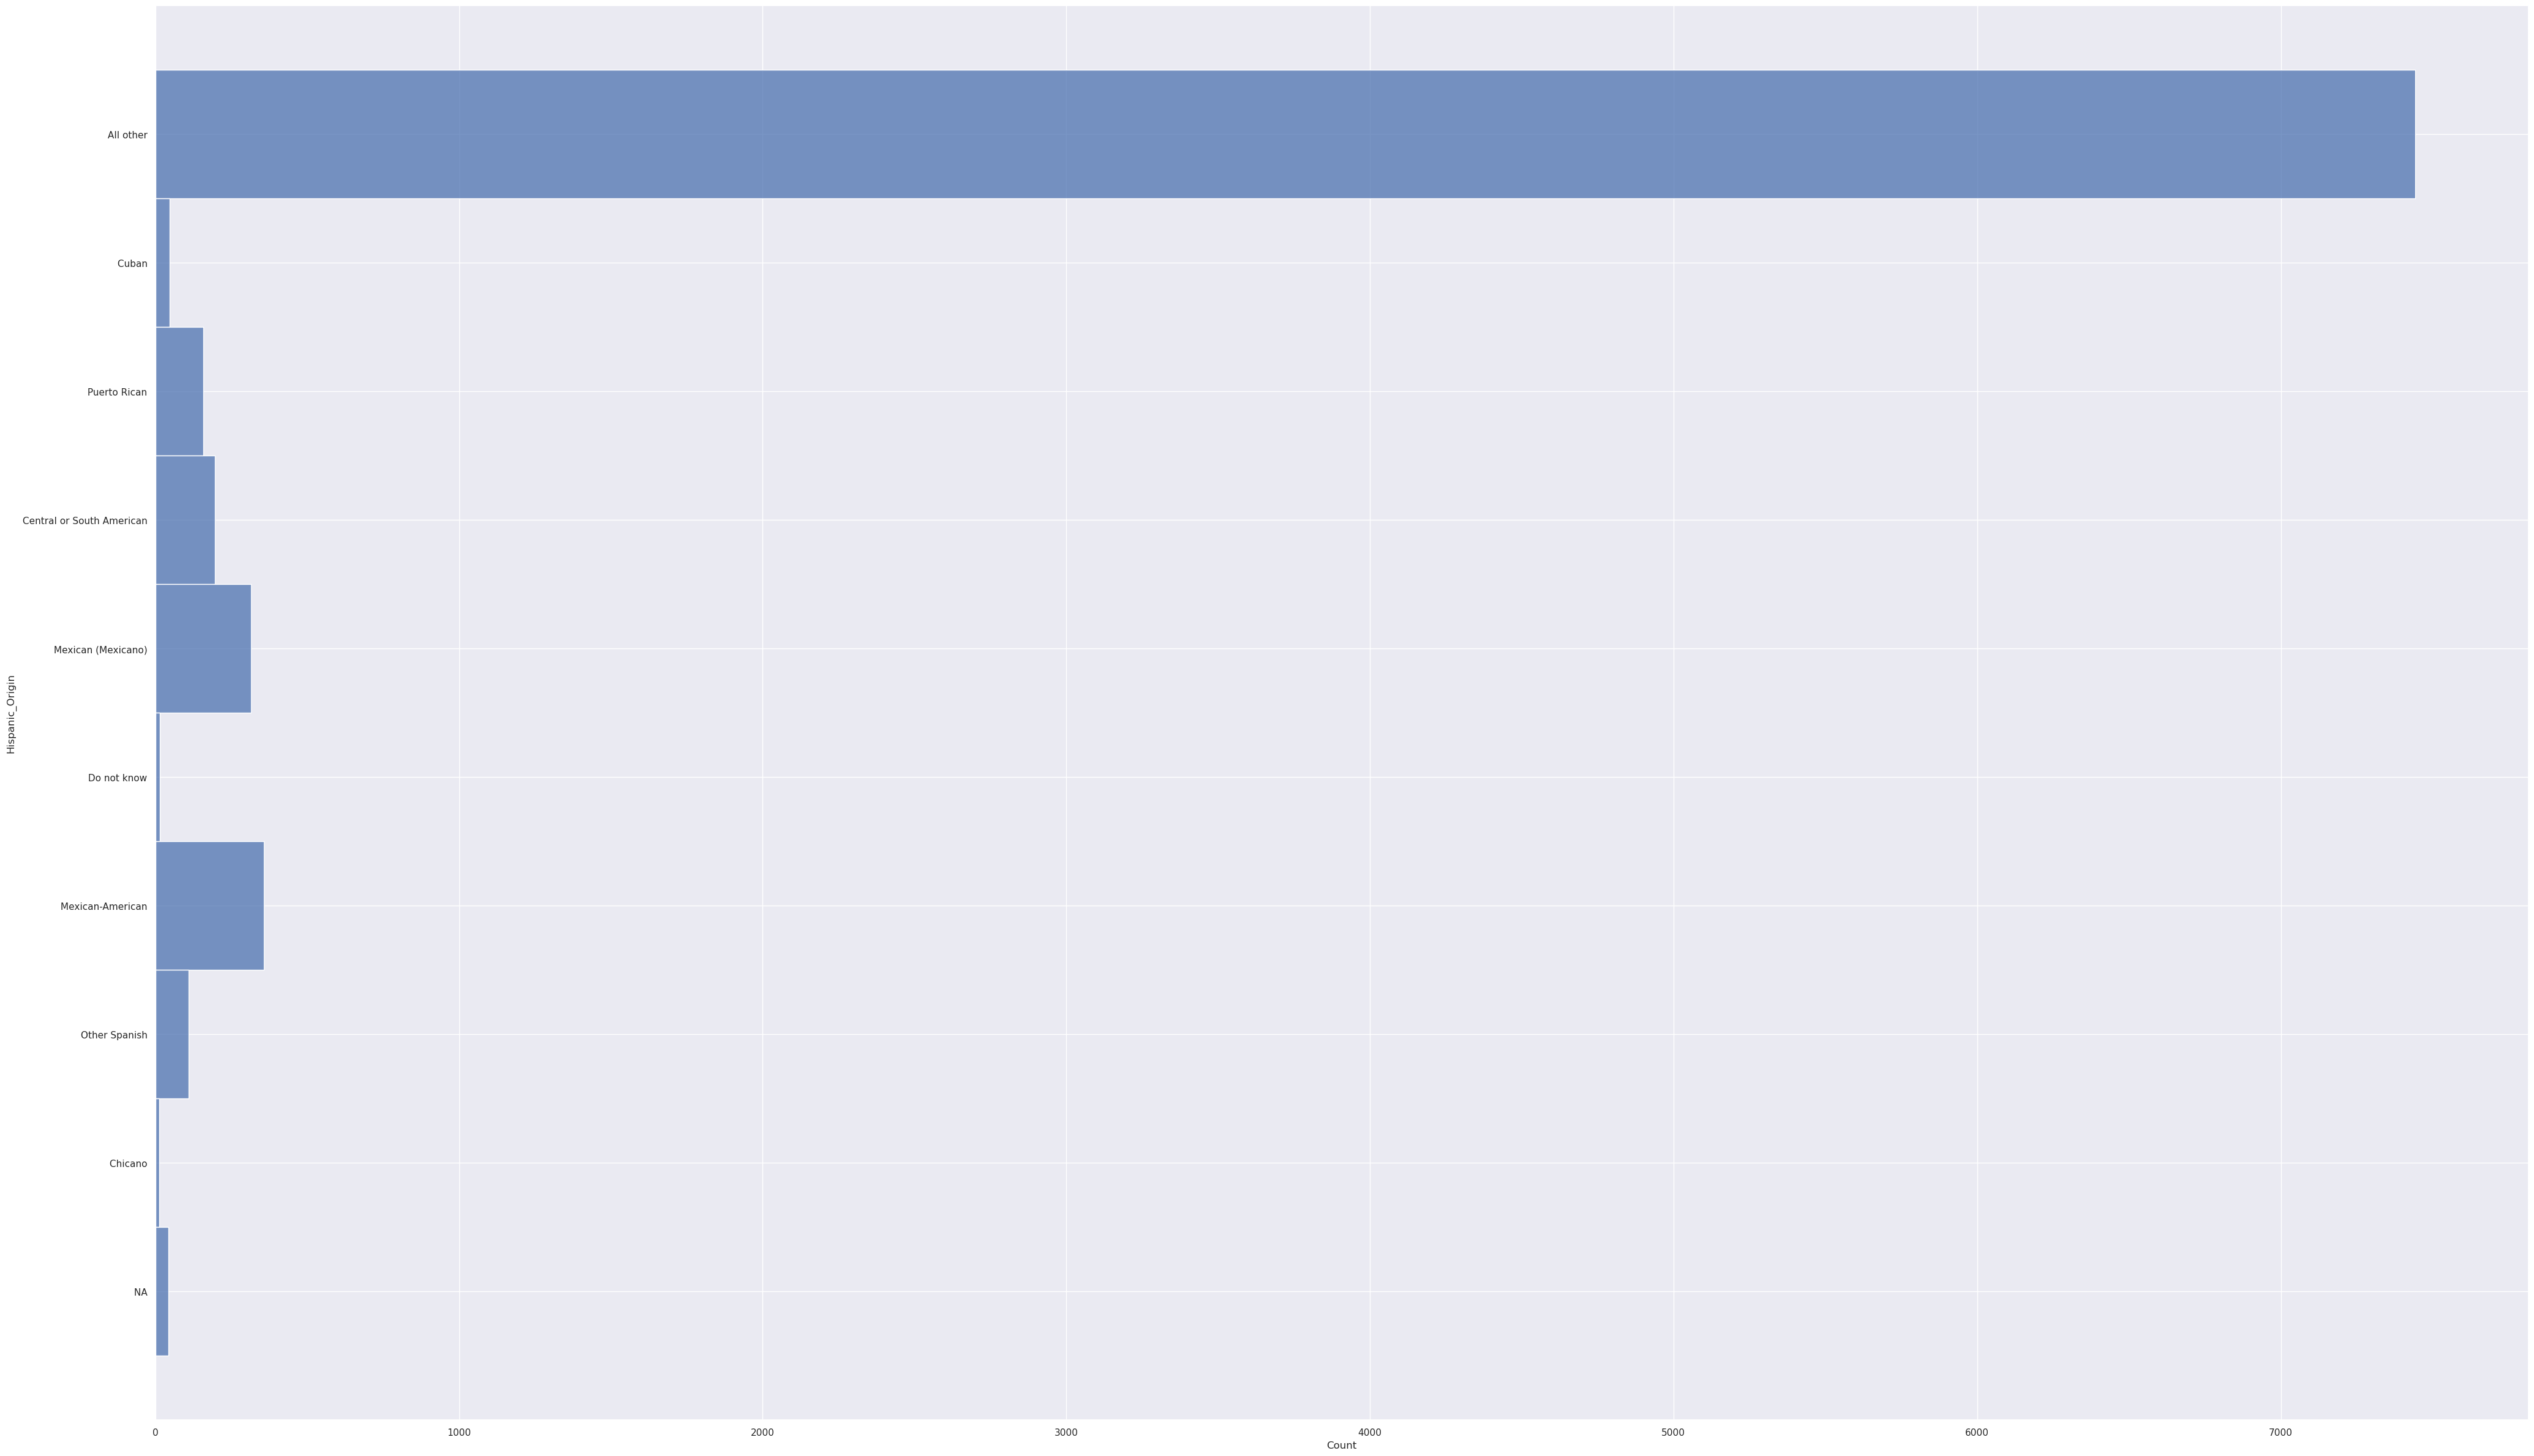

In [102]:
sns.set(rc={'figure.figsize': (50, 30),
            'font.size': 14})
# sns.set_context(font_scale=1.5)
sns.histplot(y=cat_cols_l[0], data=train[train[target]==0])

In [89]:
train[train[target]==0].groupby(cat_cols_s[0])[cat_cols_s[0]].count()

Gender
F    4623
M    4074
Name: Gender, dtype: int64

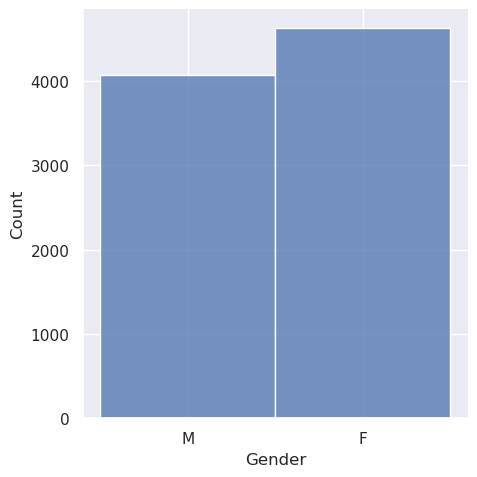